In [ ]:
%run coalition-calculations.ipynb

In [71]:
# -------------------------------
# Example usage
# -------------------------------
if __name__ == "__main__":
    kabinetten, zetels = load_data()
    coalition_counter = build_coalition_frequency(kabinetten)

    # User Input
    seat_distribution ={
        'PVV':17,
        'VVD':34,
        'D66':24,
        'BBB':1,
        'CDA':15,
        'SP':9,
        'FvD':8,
        'PvdD':6,
        'SGP':3,
        'ChristenUnie':5,
        'DENK':3,
        'Volt':3,
        'JA21':3,
        'PvdA':9,
        'GroenLinks':8,
        '50Plus':1,
        'BIJ1':1,
}

    predictions = predict_coalitions(seat_distribution, coalition_counter, threshold=76, top_k=7)
    
    for p in predictions:
        print(f"Coalition: {p['coalition']}")
        print(f"  Seats: {p['seats']}")
        print(f"  History Score: {p['historical_score']}")
        print(f"  Topic Score: {p['topic_score']}")
        print(f"  Ideology Score: {p['ideology_score']}")
        print(f"  Party Penalty: {p['party_penalty']}")
        print(f"  Surplus Penalty: {p['surplus_penalty']}")
        print(f"  Final Score: {p['final_score']}%")
        print("")

Coalition: ('VVD', 'D66', 'CDA', 'GroenLinks')
  Seats: 81
  History Score: 1.97
  Topic Score: 0.2
  Ideology Score: 2.17
  Party Penalty: 0
  Surplus Penalty: 0.0
  Final Score: 50.4%

Coalition: ('VVD', 'D66', 'CDA', 'SGP')
  Seats: 76
  History Score: 1.97
  Topic Score: 0.17
  Ideology Score: 2.17
  Party Penalty: 0
  Surplus Penalty: 0.0
  Final Score: 48.8%

Coalition: ('VVD', 'D66', 'CDA', 'ChristenUnie')
  Seats: 78
  History Score: 1.83
  Topic Score: 0.2
  Ideology Score: 2.17
  Party Penalty: 0
  Surplus Penalty: 0.0
  Final Score: 43.3%

Coalition: ('VVD', 'D66', 'CDA', 'Volt')
  Seats: 76
  History Score: 1.97
  Topic Score: 0.14
  Ideology Score: 2.33
  Party Penalty: 0
  Surplus Penalty: 0.0
  Final Score: 39.2%

Coalition: ('VVD', 'D66', 'CDA', 'GroenLinks', '50Plus')
  Seats: 82
  History Score: 1.97
  Topic Score: 0.2
  Ideology Score: 1.8
  Party Penalty: 2
  Surplus Penalty: 0.0
  Final Score: 18.7%

Coalition: ('VVD', 'D66', 'CDA', 'PvdD')
  Seats: 79
  History Sc

In [68]:
# parties_2023 = {
#         'VVD': 24,
#         'PvdA': 0,
#         'GL': 25,
#         'D66': 9,
#         'CDA': 5,
#         'CU': 3,
#         'PVV': 37,
#         'BBB': 7,
#         'SP': 5,
#         'PvdD': 3,
#         'NSC': 20,
#         'DENK': 3,
#         'FvD': 3,
#         'SGP': 3,
#         'Volt': 2,
#         'JA21': 1
# }

# parties_2021 = {
#         'PVV':17,
#         'VVD':34,
#         'D66':24,
#         'BBB':1,
#         'CDA':15,
#         'SP':9,
#         'FvD':8,
#         'PvdD':6,
#         'SGP':3,
#         'ChristenUnie':5,
#         'DENK':3,
#         'Volt':3,
#         'JA21':3,
#         'PvdA':9,
#         'GroenLinks':8,
#         '50Plus':1,
#         'BIJ1':1,
# }

/tmp/ipykernel_211407/3134135300.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=final_scores, y=coalitions, palette='viridis')


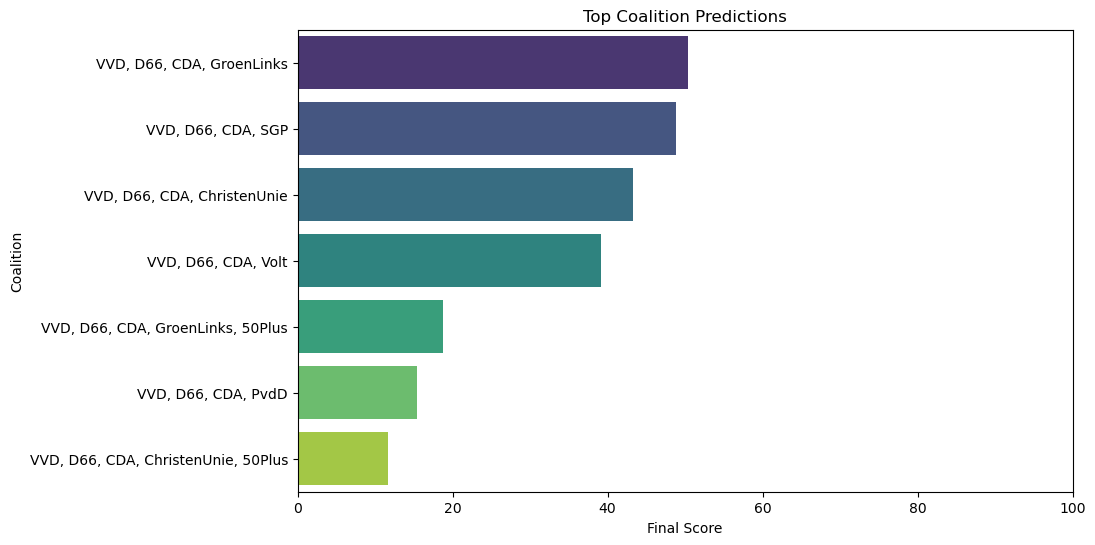

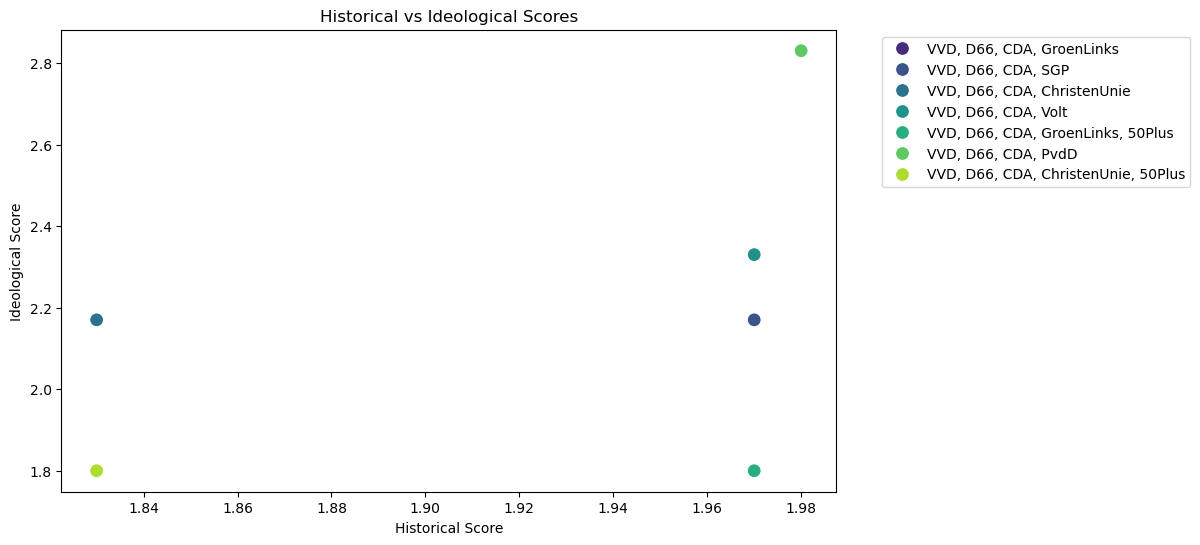

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_coalition_scores(predictions):
    coalitions = [', '.join(p['coalition']) for p in predictions]
    final_scores = [p['final_score'] for p in predictions]

    plt.figure(figsize=(10, 6))
    sns.barplot(x=final_scores, y=coalitions, palette='viridis')
    plt.xlabel('Final Score')
    plt.ylabel('Coalition')
    plt.title('Top Coalition Predictions')
    plt.xlim(0, 100)
    plt.show()


def plot_historical_vs_ideological(predictions):
    historical_scores = [p['historical_score'] for p in predictions]
    ideological_scores = [p['ideology_score'] for p in predictions]
    coalitions = [', '.join(p['coalition']) for p in predictions]

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=historical_scores, y=ideological_scores, hue=coalitions, palette='viridis', s=100)
    plt.xlabel('Historical Score')
    plt.ylabel('Ideological Score')
    plt.title('Historical vs Ideological Scores')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()


plot_coalition_scores(predictions)
plot_historical_vs_ideological(predictions)